In [15]:
import pandas as pd
from scipy.stats import pearsonr
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr

In [4]:
proteomics_df = pd.read_csv('proteomics.txt', sep='\t', index_col=0)
metadata_df = pd.read_csv('metadata.csv')

proteomics_df = proteomics_df.T

combined_df = pd.merge(proteomics_df, metadata_df, left_index=True, right_on='Patient_ID')

In [6]:
combined_df.head()

,A1BG,A2M,AAMDC,AARS1,AASDHPPT,AASS,ABAT,ABCC4,ABCE1,ABCF1,...,Tumor_Size_mm,Histological_Grade,Lymph_Node_Involvement,Metastasis,Treatment,Response_to_Treatment,Follow_up_Duration_months,Survival_Status,Family_History_of_Cancer,Ethnicity
0,1.047640e+09,1.304314e+10,35395800.0,77138600.0,1322772.000,2.149774e+07,1.615196e+07,2294820.000,1.101012e+07,24670800.0,...,31,Low,No,No,Surgery,Complete Remission,25,Survived,No,Caucasian
1,1.113700e+09,6.184000e+09,58690000.0,96508000.0,9252077.742,3.165600e+06,8.644212e+06,1917313.735,1.235980e+07,8326600.0,...,34,Intermediate,No,No,Combination,Complete Remission,40,Survived,Yes,Hispanic
2,1.055760e+09,6.564800e+09,9091800.0,46406000.0,3913600.000,4.620000e+06,4.325549e+06,3463000.000,2.843400e+06,7310400.0,...,39,Intermediate,Yes,No,Chemotherapy,Complete Remission,19,Survived,No,African-American
3,1.104000e+09,4.329400e+09,41908000.0,17550000.0,1687937.466,5.226863e+06,7.219093e+06,3200134.601,1.423474e+06,6473600.0,...,31,Low,No,No,Radiation,Complete Remission,42,Survived,Yes,Other
4,1.158380e+09,9.797400e+09,39804000.0,56650000.0,5560375.423,9.672200e+06,8.832000e+06,5298370.284,7.971200e+06,7818800.0,...,34,Intermediate,Yes,No,Surgery,Complete Remission,60,Survived,No,Caucasian


In [42]:
selected_features = ['NINJ1', 'CTBP2', 'DOCK1', 'FAHD2A', 'IGLV5-45', 'STAT5A', 'MCM3', 'SELENOF', 
                     'MANF', 'FKBP5', 'SEC24A', 'CEACAM7', 'ITGAM', 'ANKRD13A', 'S100A12', 'HBG2', 
                     'PODN', 'FCN3']
patient_metadata = ['Tumor_Size_mm', 'Histological_Grade', 'Lymph_Node_Involvement', 'Metastasis', 
                    'Treatment', 'Response_to_Treatment', 'Follow_up_Duration_months', 
                    'Survival_Status', 'Family_History_of_Cancer', 'Ethnicity']

# Filter the dataset
filtered_data = combined_df[selected_features+patient_metadata]

In [43]:
filtered_data.head()

,NINJ1,CTBP2,DOCK1,FAHD2A,IGLV5-45,STAT5A,MCM3,SELENOF,MANF,FKBP5,...,Tumor_Size_mm,Histological_Grade,Lymph_Node_Involvement,Metastasis,Treatment,Response_to_Treatment,Follow_up_Duration_months,Survival_Status,Family_History_of_Cancer,Ethnicity
0,1.608618e+07,4.788960e+06,69214200.0,9502460.00,8.656980e+06,2838440.000,8.075045e+06,25966600.0,471108000.0,8.314020e+06,...,31,Low,No,No,Surgery,Complete Remission,25,Survived,No,Caucasian
1,8.857400e+06,2.684507e+06,228460000.0,66761253.14,3.963200e+07,5764026.065,2.151618e+07,82630000.0,786040000.0,6.392507e+07,...,34,Intermediate,No,No,Combination,Complete Remission,40,Survived,Yes,Hispanic
2,1.292704e+07,1.283322e+06,125576000.0,12792286.28,1.628702e+07,1755640.000,3.560800e+07,24030000.0,336800000.0,1.650660e+07,...,39,Intermediate,Yes,No,Chemotherapy,Complete Remission,19,Survived,No,African-American
3,8.308014e+06,1.569487e+06,215060000.0,25290631.31,1.402302e+07,5619660.803,1.755334e+07,8261400.0,69574000.0,5.474447e+06,...,31,Low,No,No,Radiation,Complete Remission,42,Survived,Yes,Other
4,1.463373e+06,8.069640e+05,125482000.0,5228000.00,5.658388e+05,1264567.786,4.754734e+05,24868000.0,216120000.0,9.826913e+05,...,34,Intermediate,Yes,No,Surgery,Complete Remission,60,Survived,No,Caucasian


In [69]:
continuous_metadata = ['Tumor_Size_mm', 'Follow_up_Duration_months']  


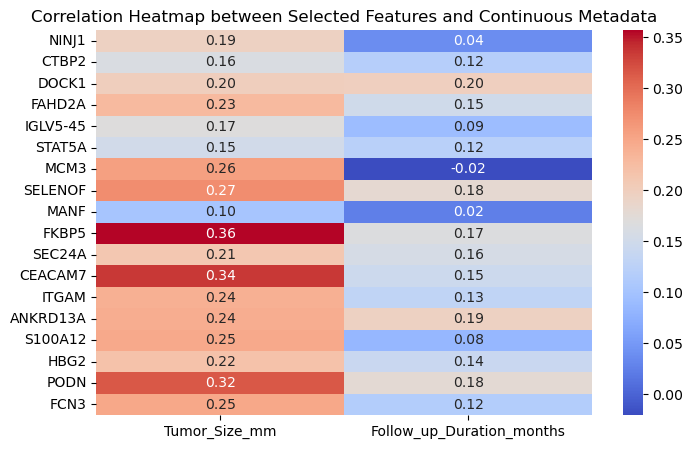

In [70]:
continuous_corr_matrix = filtered_data[selected_features + continuous_metadata].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(continuous_corr_matrix.loc[selected_features, continuous_metadata], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap between Selected Features and Continuous Metadata')
plt.show()

In [71]:
categorical_vars = ['Histological_Grade', 'Lymph_Node_Involvement', 'Metastasis', 
                    'Treatment', 'Response_to_Treatment', 'Survival_Status', 
                    'Family_History_of_Cancer', 'Ethnicity']

# One-hot encode categorical variables
encoded_categorical = pd.get_dummies(filtered_data[categorical_vars])
encoded_data = pd.concat([filtered_data, encoded_categorical], axis=1)
encoded_data.drop(categorical_vars, axis=1, inplace=True)

In [72]:
corr_matrix = encoded_data[selected_features + encoded_categorical.columns.tolist()].corr()
for feature in selected_features:
    correlations = corr_matrix[feature].loc[encoded_categorical.columns]
    #print(f"Correlations of {feature} with encoded patient metadata:\n{correlations}\n")

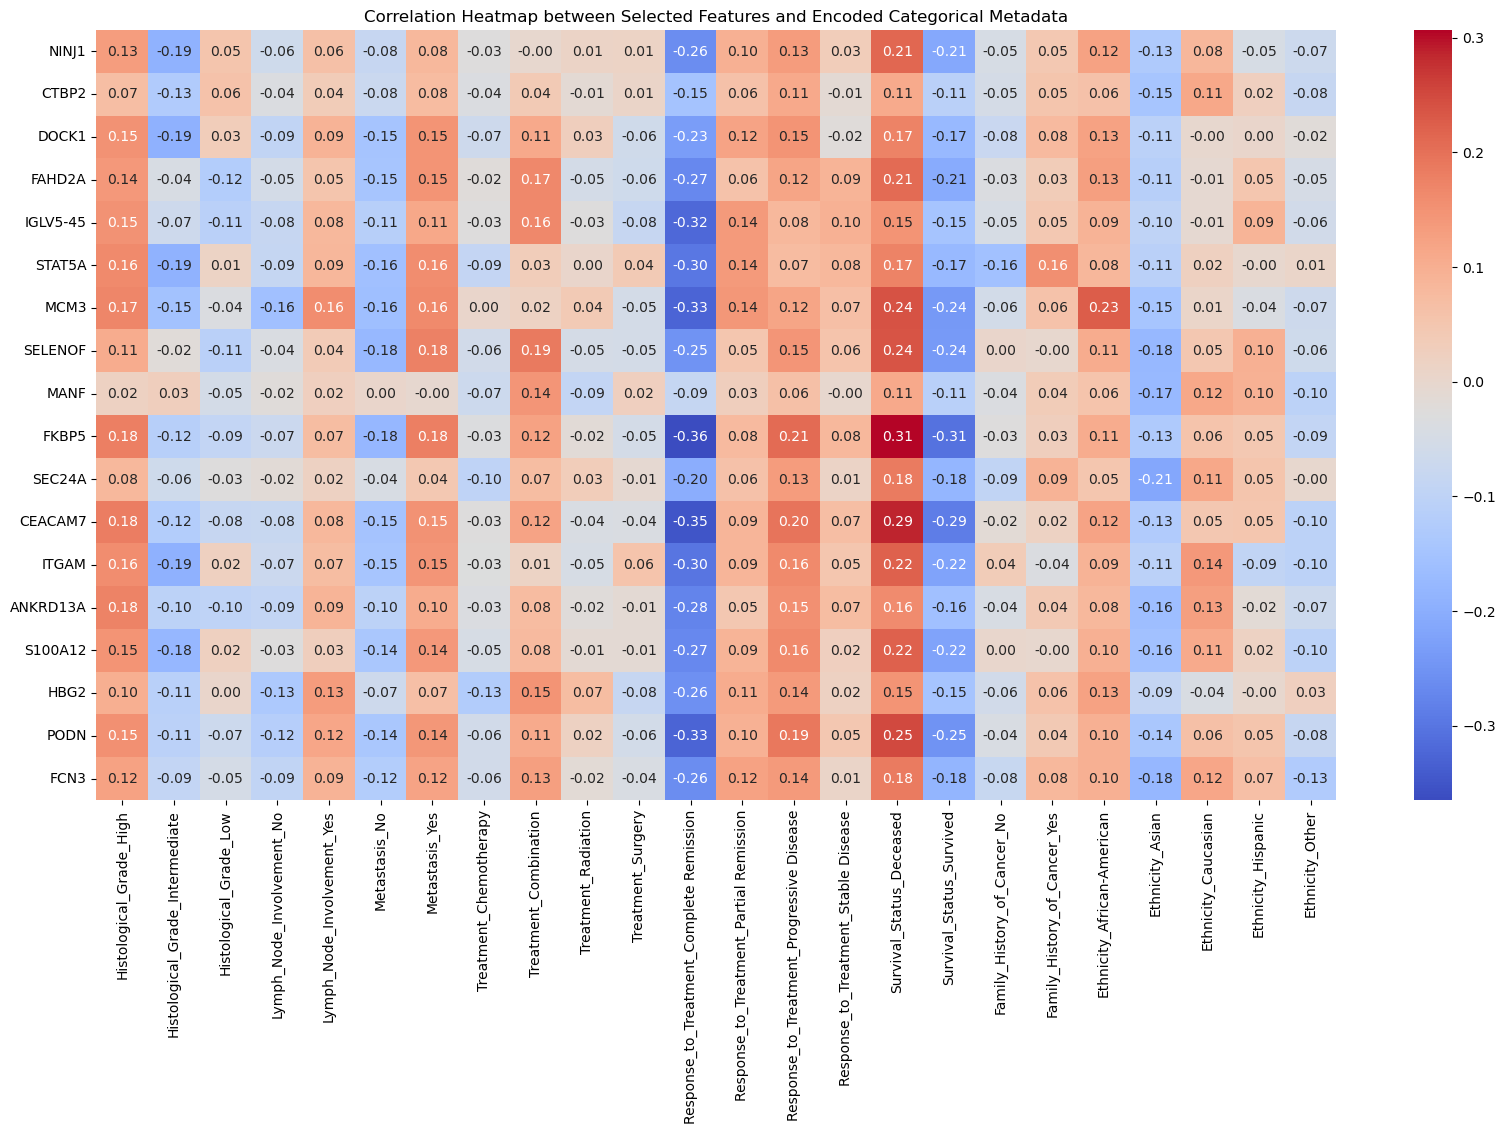

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlations
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix.loc[selected_features, encoded_categorical.columns], annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap between Selected Features and Encoded Categorical Metadata')
plt.show()


Try to find relationship between selected features and tumor sizes

In [ ]:
X = filtered_data[selected_features]  
y = filtered_data['Tumor_Size_mm']